# Analiza Pokemonów

## To do
Na podstawie inormacji zawartych w DB wyciągnąć wnioski na temat tego jakie pokemony można stworzyć w następnej generacji.
pokazać jakie pokemony legendarne powstały i ile ich jest na podstawie typu i jakie potencjalne legendarne pokemony można stworzyć w przyszych generacjach
Heatmapa Efektywności typów względem siebie
Korelacja statystyk
Pokazanie róznicy w statystykach konkretnych typów

5. pokazać czy typ pokemona ma znaczenie na % danej płci, i ogólnikowe wystepowanie danej płci wszsytkich pokemonów ile pokemonów nie ma płci
6. pokazać co ma znaczenie przy zdobywaniu doświadzczenia
7. czy typ pokemona ma znaczenia na jego wzrost i wagę
8. pokazać co ma znaczenie przy łapaniu pokemona

10. na podstawie wagi wzrostu i typu sprawdzić korelacje miedzy danymi 
11. konwersja statystyk do Pokemon Go
12. pokazać różnicę w statystykach gier pokemon z pokemon go

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure as fig
from matplotlib import colorbar as cb
import seaborn as sns
import scipy as sc
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator

#Słownik Typów i odpowadającym im kolorów
pokemon_colors = {
    'Bug': '#A8B820',
    'Electric': '#F8D030',
    'Fairy': '#EE99AC',
    'Fighting': '#C03028',
    'Fire': '#F08030',
    'Flying': '#A890F0',
    'Grass': '#78C850',
    'Ice': '#98D8D8',
    'Poison': '#A040A0',
    'Psychic': '#F85888',
    'Rock': '#B8A038',
    'Steel': '#B8B8D0',
    'Water': '#6890F0',
    'Dragon': '#7038F8',
    'Dark': '#705848',
    'Ghost': '#705898',
    'Ground': '#E0C068',
    'Normal': '#A8A878'
}
stat_color = {
    'attack': 'red',
    'sp_attack': 'orange',
    'speed': 'yellow',
    'hp': 'green',
    'defense': 'blue',
    'sp_defense': 'purple'
    }

### Wczytanie bazy danych

In [113]:
PokemonDB = pd.read_csv(r'PokemonDB_updated.csv')
PokemonDB

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,NaN,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


### Random state na podstawie numeru w pokedesie

In [69]:
rs = PokemonDB[PokemonDB['name'] == 'Pikachu']['pokedex_number'].values[0]

### Informacje na temat PokemonDB

In [70]:
PokemonDB.head()

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


### Wczytanie bazy danych typing_chart.csv i wypełnienie pustych komórek jedynkami

In [71]:
TypingChart = pd.read_csv(r'Typing_Chart.csv',index_col=0)
TypingChart = TypingChart.fillna(1)
TypingChart = TypingChart.sort_index(axis =  1)
TypingChart = TypingChart.sort_index()
TypingChart


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Types,,,,,,,,,,,,,,,,,,
Bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
Dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0
Fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2.0,0.5,0.5,2.0,2.0,1.0
Fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.5,2.0,0.5
Flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0
Ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0


### TypingChart to tablica w której są zapisane słąbości i mocne strony każdego z typów

In [72]:
TypingChart.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Types,,,,,,,,,,,,,,,,,,
Bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
Dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0


## Grupowanie pokemonów względem Głównego typu i zliczenie ich

In [73]:
df = PokemonDB[PokemonDB['type2'].isna()]
df = df['type1'].value_counts().reset_index()
df

,type1,count
0,Normal,61
1,Water,61
2,Grass,37
3,Psychic,35
4,Fire,27
5,Electric,26
6,Fighting,22
7,Bug,18
8,Fairy,16
9,Poison,13


## Grupowanie pokemonów z dwoma typami i zgrupowanie ich na podstawie typu Głównego

In [74]:
type1_and_type2 = PokemonDB[PokemonDB['type2'].notna()]

# Liczba Pokémonów tylko z typem pierwszym i drugim
type_combination_counts = type1_and_type2.groupby(['type1', 'type2']).size().reset_index(name='count')
print("\nLiczba Pokémonów z type1 i type2:")
type_combination_counts.sample(5,random_state=rs)


Liczba Pokémonów z type1 i type2:


,type1,type2,count
111,Psychic,Steel,1
97,Poison,Dark,3
108,Psychic,Flying,6
65,Grass,Grass,1
41,Fire,Fighting,6


### Stworzenie uproszczonej bazy danych z wagą pokemonów

In [75]:
weightsDB = PokemonDB.loc[:,["pokedex_number","type1","type2","weight_kg"]]
weightsDB['weight_kg'] = pd.to_numeric(weightsDB["weight_kg"])
weightsDB.to_csv(r'WeightsDB.csv')

weightsDB

,pokedex_number,type1,type2,weight_kg
0,1,Grass,Poison,6.9
1,2,Grass,Poison,13.0
2,3,Grass,Poison,100.0
3,4,Fire,NaN,8.5
4,5,Fire,NaN,19.0
...,...,...,...,...
796,797,Steel,Flying,999.9
797,798,Grass,Steel,0.1
798,799,Dark,Dragon,888.0
799,800,Psychic,NaN,230.0


In [76]:
weightsDB.sample()

,pokedex_number,type1,type2,weight_kg
279,280,Psychic,Fairy,6.6


### Zliczenie pokwmonów  na podstawie dystrybucji typów

In [77]:
two_typesdb = PokemonDB.dropna(subset=['type2'])

count = two_typesdb['pokedex_number'].count()

print(f'Pokemonów z dwoma typami w 7 generacjach jest łącznie {count}')
two_typesdb.sample(5,random_state=rs)

Pokemonów z dwoma typami w 7 generacjach jest łącznie 417


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
39,40,Wigglytuff,1,Normal,Fairy,Balloon Pokémon,0,70,85,45,...,0.0,1.00,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
138,139,Omastar,1,Rock,Water,Spiral Pokémon,0,60,115,125,...,1.0,4.00,2.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0
187,188,Skiploom,2,Grass,Flying,Cottonweed Pokémon,0,45,45,50,...,1.0,0.25,0.0,4.0,1.0,2.0,1.0,2.0,1.0,0.5
767,768,Golisopod,7,Bug,Water,Hard Scale Pokémon,0,125,60,140,...,1.0,1.00,0.5,0.5,1.0,1.0,1.0,2.0,0.5,0.5
585,586,Sawsbuck,5,Normal,Grass,Season Pokémon,0,100,60,70,...,0.0,0.50,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [78]:
one_typedb = PokemonDB[PokemonDB['type2'].isna()].fillna('')

count = one_typedb['pokedex_number'].count()

print(f'Pokemonów z jednym typem w 7 generacjach jest łącznie {count}')
one_typedb.sample(5,random_state=rs)

Pokemonów z jednym typem w 7 generacjach jest łącznie 384


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
711,712,Bergmite,6,Ice,,Ice Chunk Pokémon,0,69,32,85,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
670,671,Florges,6,Fairy,,Garden Pokémon,0,65,112,68,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
613,614,Beartic,5,Ice,,Freezing Pokémon,0,130,70,80,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
761,762,Steenee,7,Grass,,Fruit Pokémon,0,40,40,48,...,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5
357,358,Chimecho,3,Psychic,,Wind Chime Pokémon,0,50,95,80,...,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


## 1. Na podstawie inormacji zawartych w DB można wyciągnąć wnioski na temat tego jakie pokemony można stworzyć w następnej generacji.

In [79]:
pivot_df = type_combination_counts.pivot(index='type1', columns='type2', values='count').fillna(0)
pivot_df

type2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type1,,,,,,,,,,,,,,,,,,
Bug,0.0,0.0,0.0,4.0,2.0,3.0,2.0,13.0,1.0,6.0,1.0,0.0,0.0,11.0,0.0,3.0,5.0,3.0
Dark,0.0,0.0,4.0,0.0,0.0,2.0,2.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
Electric,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
Fairy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
Fire,0.0,1.0,1.0,0.0,0.0,6.0,1.0,6.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0
Flying,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,0.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,5.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


## Graf słupkowy zestakowany, przedstawia dystrybucje typów pokemonów 

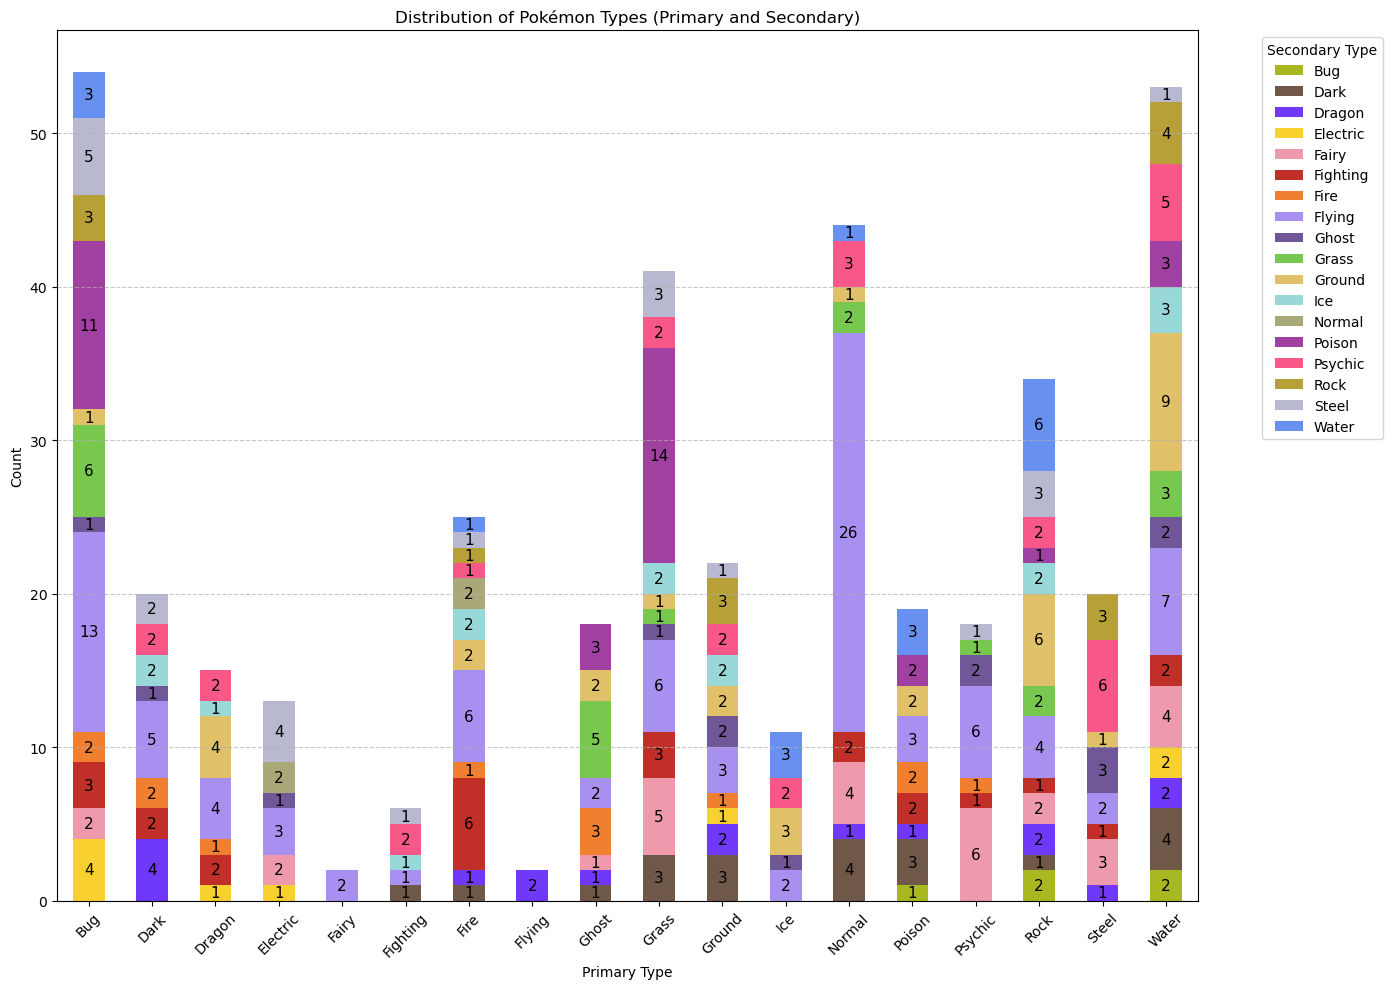

In [80]:
colors = [pokemon_colors.get(col, '#000000') for col in pivot_df.columns]
ax = pivot_df.plot(kind='bar',stacked=True,figsize=(14,10), color=colors)

#for container in ax.containers:
#    # Add labels to each bar in the container
#    ax.bar_label(container, label_type='center')
    
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            # Adding a small visible bar for labels with height 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y(), '')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', fontsize=11)

    
plt.title('Distribution of Pokémon Types (Primary and Secondary)')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Secondary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Podobnie jak wyżej w grafie słupkowym tak jak i na Heat mapie widzimy jak ma się dystrybucja każdego z typów

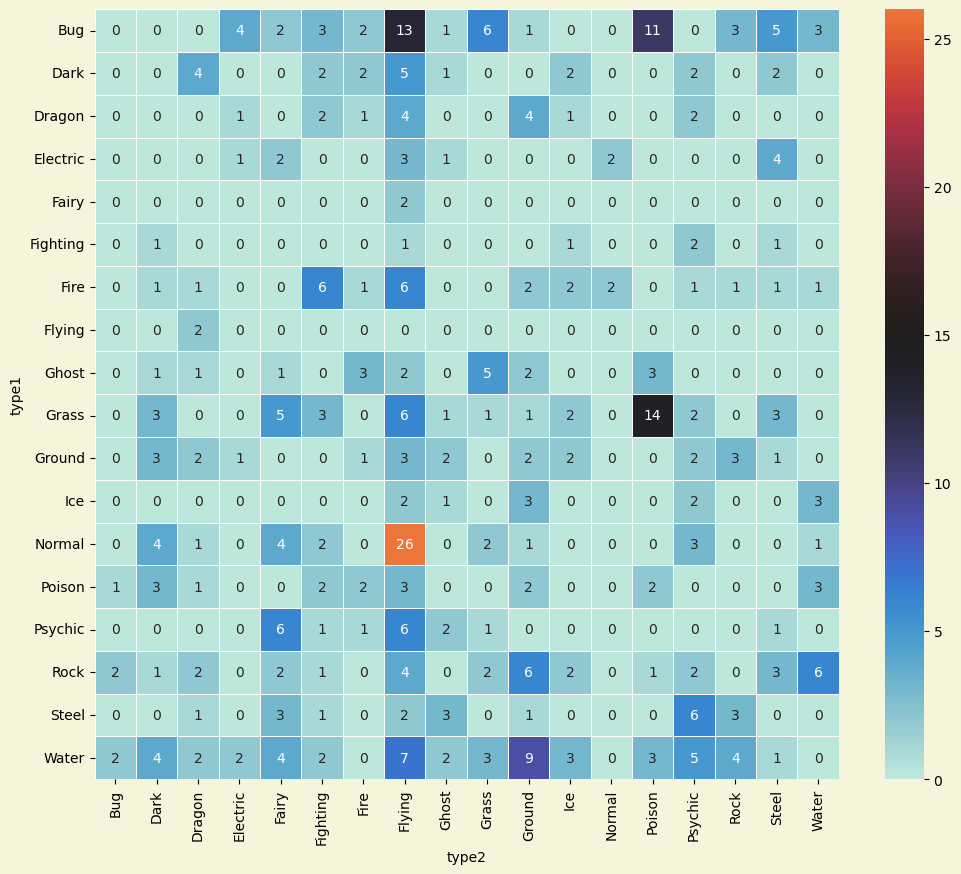

In [81]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(pivot_df ,annot= True ,cmap="icefire",linewidths=.5,center=15)
fig.patch.set_facecolor('beige')


### W trakcie pracy na tej bazie danych zauważyłem że jeden z pokemonów ma type1 taki sam jak type2. Jest to pokemon z pokemon_indexem = 491. Wykorzystałem ten niby błąd o utworzenia zbiorczego wykresu i heatmapy.

In [82]:
PokemonDB.query('type1 == "Grass" & type2 == "Grass"')

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
491,492,Shaymin,4,Grass,Grass,Gratitude Pokémon,1,103,120,75,...,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [83]:
PokemonDB.loc[491]

pokedex_number                     492
name                           Shaymin
generation                           4
type1                            Grass
type2                            Grass
classfication        Gratitude Pokémon
is_legendary                         1
attack                             103
sp_attack                          120
defense                             75
sp_defense                          75
hp                                 100
speed                              127
base_total                         600
height_m                           0.2
weight_kg                          2.1
percentage_male                    NaN
capture_rate                        45
experience_growth              1059860
against_bug                        2.0
against_dark                       1.0
against_dragon                     1.0
against_electric                   0.5
against_fairy                      1.0
against_fight                      1.0
against_fire             

### [Debuging?] Wyszukiwanie duplikatów w kolumnie type1 i type2 i zamiana ich na NaN

### do pokemonów bez typu pobocznego dodałem tam duplikat typu głównego aby wykorzystać te inforamcje na wizualizacjach

In [84]:
condition = PokemonDB['type2'].isna()
PokemonDB2 = PokemonDB
PokemonDB2.loc[condition, 'type2'] = PokemonDB2['type1']
PokemonDB2.loc[491,["name","type1","type2"]]
PokemonDB

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,Fire,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,Fire,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,Psychic,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


### Poprawiony graf słupkowy

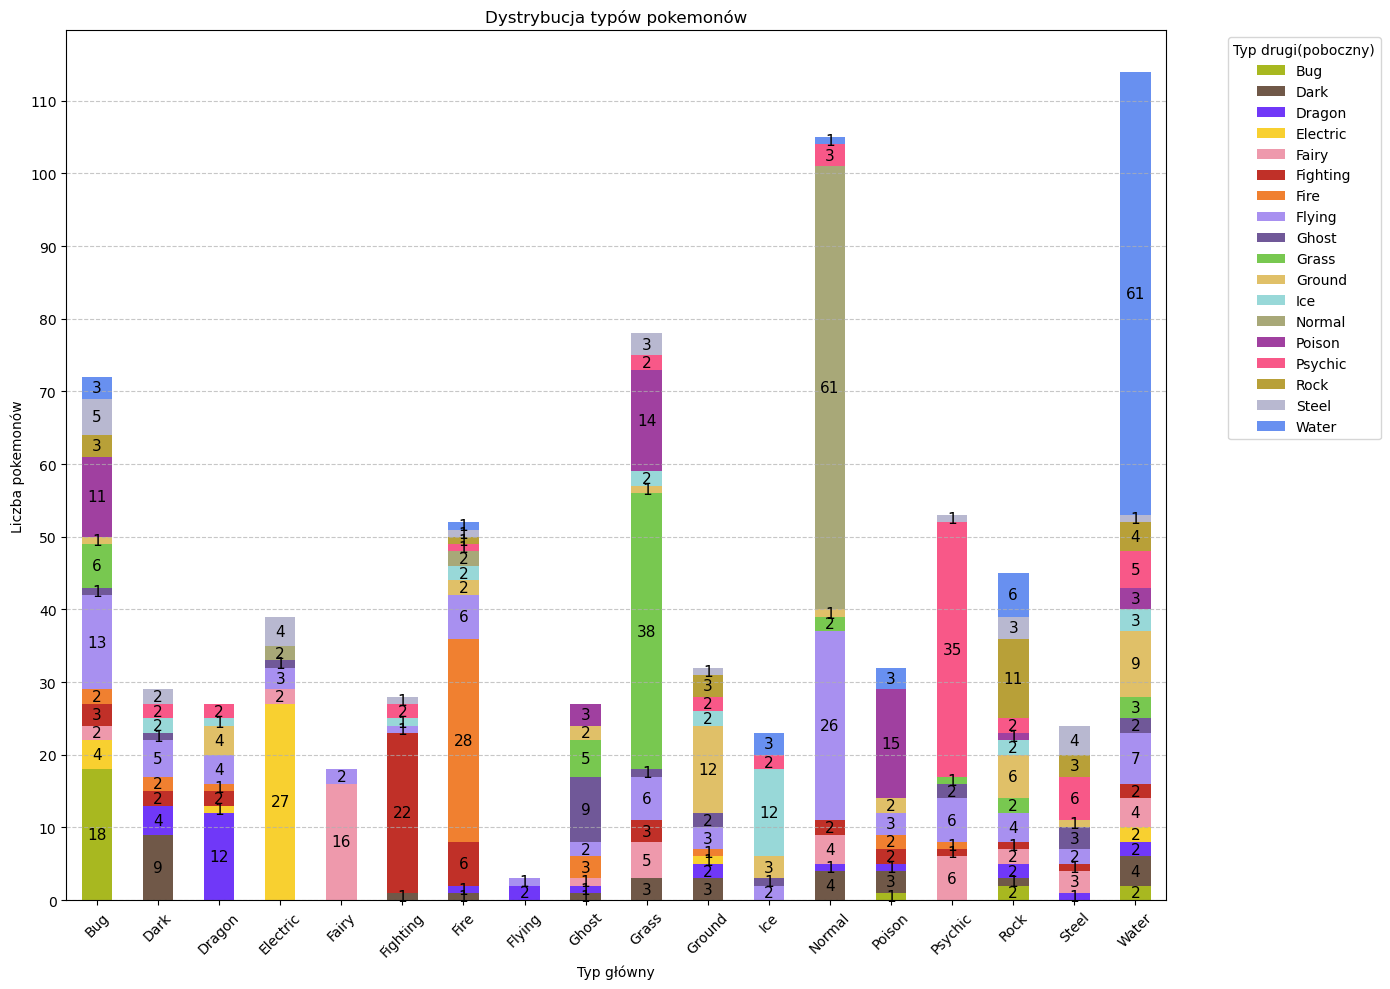

In [85]:
type_combination_counts = PokemonDB2.groupby(['type1', 'type2']).size().reset_index(name='count')

pivot_df = type_combination_counts.pivot(index='type1', columns='type2', values='count').fillna(0)

colors = [pokemon_colors.get(col, '#000000') for col in pivot_df.columns]
ax = pivot_df.plot(kind='bar',stacked=True,figsize=(14,10), color=colors)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            # Adding a small visible bar for labels with height 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y(), '')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', fontsize=11)
        
ax.yaxis.set_major_locator(MultipleLocator(10))

plt.title('Dystrybucja typów pokemonów')
plt.xlabel('Typ główny')
plt.ylabel('Liczba pokemonów')
plt.xticks(rotation=45)
plt.legend(title='Typ drugi(poboczny)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Poprawiona heatmapa

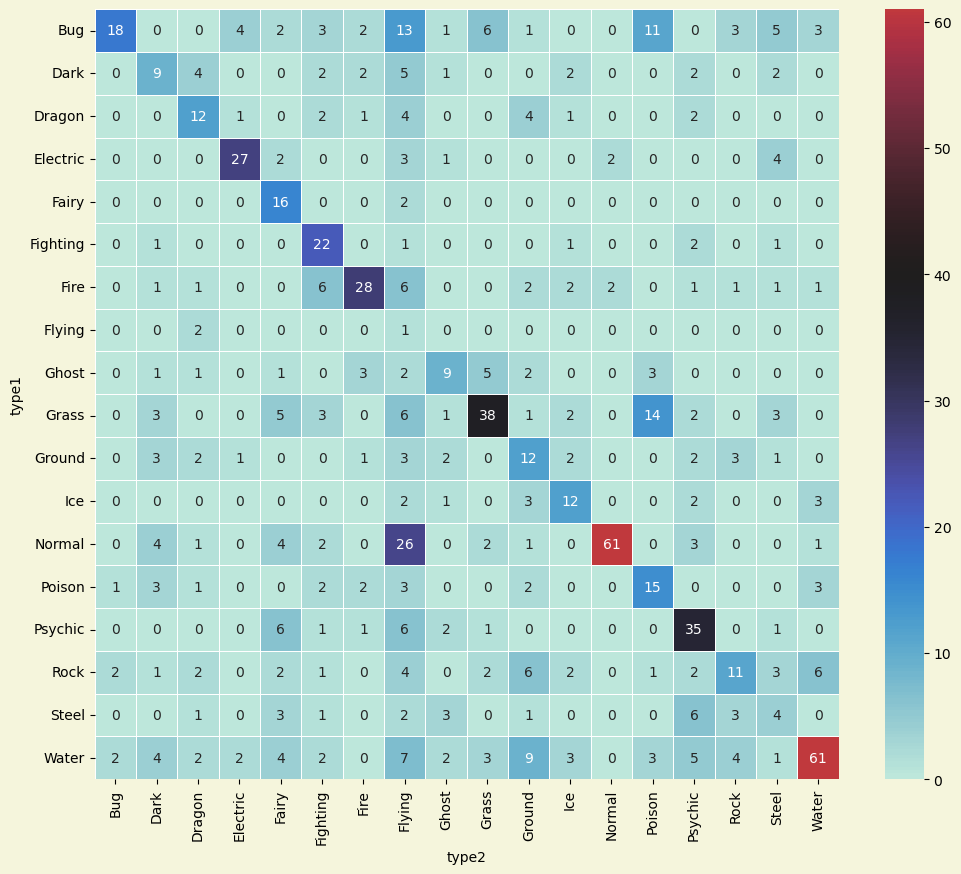

In [86]:
fig, ax = plt.subplots(figsize=(12,10))
color = sns.color_palette("icefire", as_cmap=True)
ax = sns.heatmap(pivot_df ,annot=True, cmap=color ,linewidths=.5,center=40)
sns.color_palette("cubehelix")
fig.patch.set_facecolor('beige')


## 2. Pokemony legendarne jakie powstały. Jakie nastepne?

In [87]:
is_legendary = PokemonDB[PokemonDB['is_legendary'] == 1]
is_legendary

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
143,144,Articuno,1,Ice,Flying,Freeze Pokémon,1,85,95,100,...,1.0,0.50,0.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0
144,145,Zapdos,1,Electric,Flying,Electric Pokémon,1,90,125,85,...,1.0,0.50,0.0,2.0,1.0,1.0,1.0,2.0,0.5,1.0
145,146,Moltres,1,Fire,Flying,Flame Pokémon,1,100,125,90,...,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0
149,150,Mewtwo,1,Psychic,Psychic,Genetic Pokémon,1,150,194,70,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
150,151,Mew,1,Psychic,Psychic,New Species Pokémon,1,100,100,100,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,Psychic,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


In [88]:
is_legendary_Gby = is_legendary.groupby(['type1', 'type2']).size().reset_index(name='count')
is_legendary_Gby.head

<bound method NDFrame.head of        type1     type2  count
0        Bug  Fighting      2
1        Bug     Steel      1
2       Dark      Dark      1
3       Dark    Dragon      1
4       Dark    Flying      1
5     Dragon  Electric      1
6     Dragon      Fire      1
7     Dragon    Flying      1
8     Dragon    Ground      1
9     Dragon       Ice      1
10    Dragon   Psychic      2
11  Electric  Electric      2
12  Electric     Fairy      1
13  Electric    Flying      2
14     Fairy     Fairy      1
15      Fire      Fire      1
16      Fire    Flying      2
17      Fire     Steel      1
18      Fire     Water      1
19    Flying    Flying      1
20     Ghost    Dragon      1
21     Grass     Fairy      1
22     Grass  Fighting      1
23     Grass     Grass      1
24     Grass     Steel      1
25    Ground    Flying      1
26    Ground    Ground      1
27       Ice    Flying      1
28       Ice       Ice      1
29    Normal    Normal      2
30    Normal   Psychic      1
31   Psych

In [89]:
pivot_df = is_legendary_Gby.pivot(index='type1', columns='type2', values='count').fillna(0)

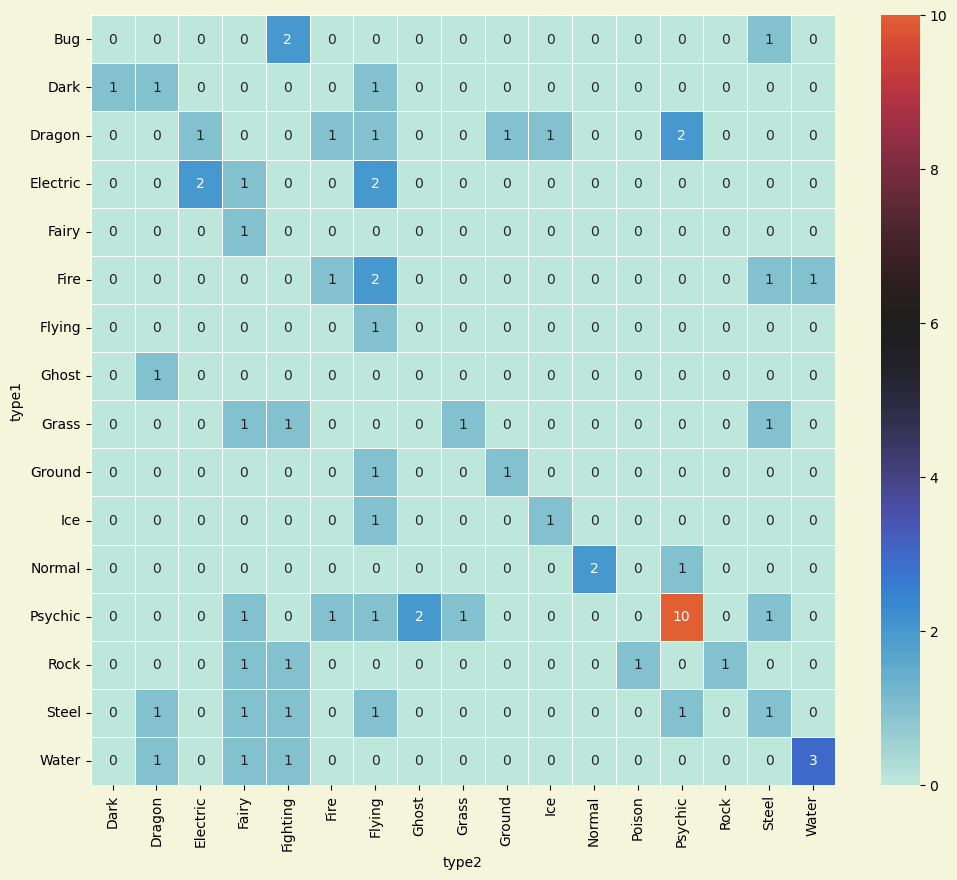

In [90]:
fig, ax = plt.subplots(figsize=(12,10))
color = sns.color_palette("icefire", as_cmap=True)
ax = sns.heatmap(pivot_df ,annot=True, cmap=color ,linewidths=.5,center=6)
sns.color_palette("cubehelix")
fig.patch.set_facecolor('beige')


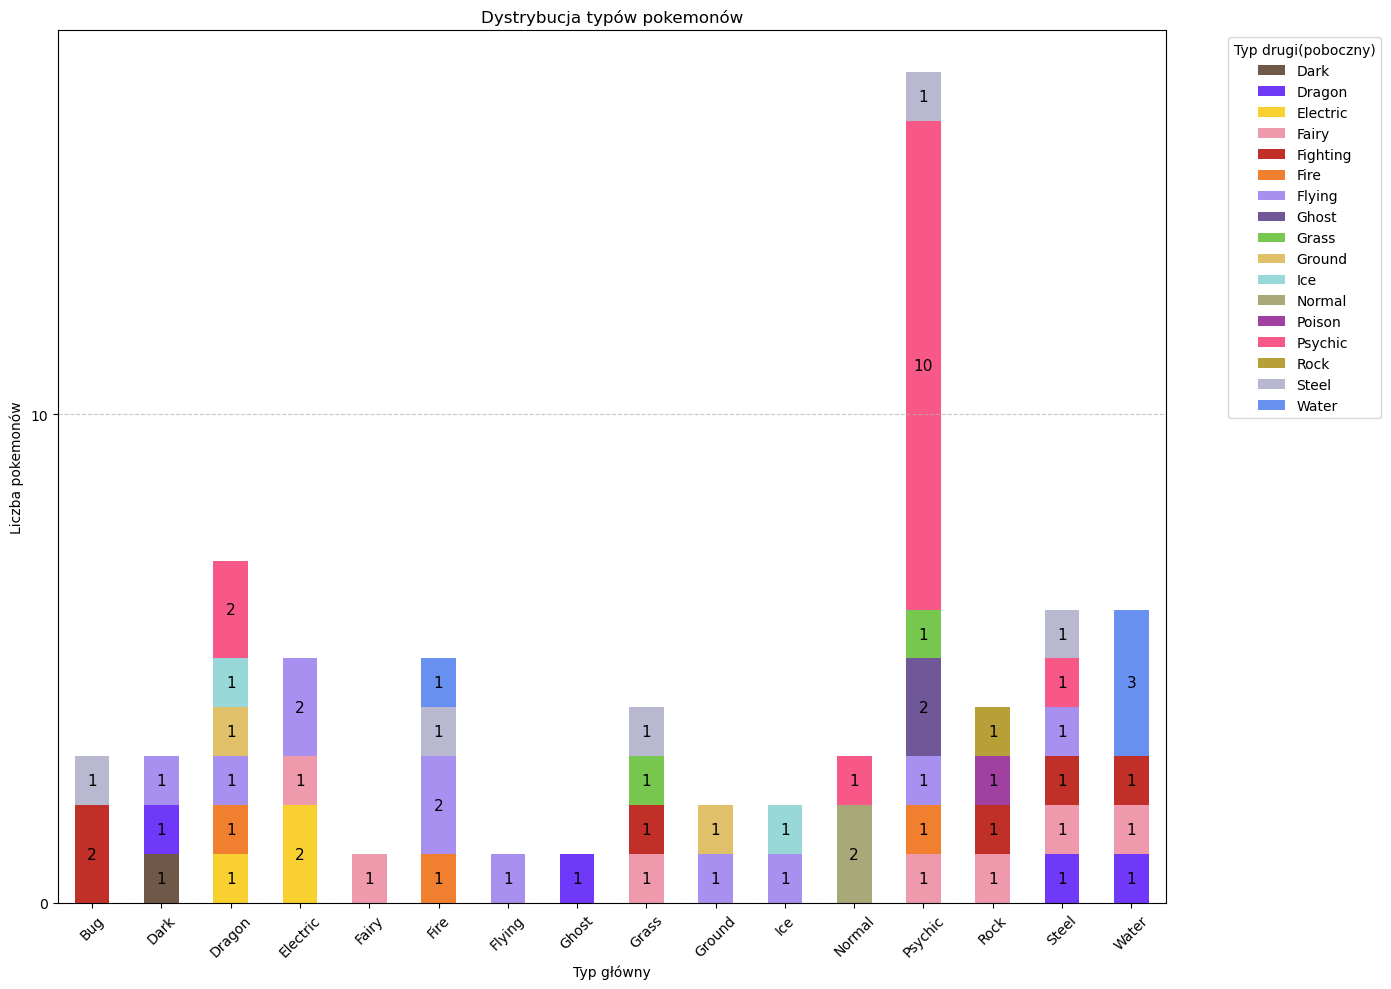

In [91]:
colors = [pokemon_colors.get(col, '#000000') for col in pivot_df.columns]
ax = pivot_df.plot(kind='bar',stacked=True,figsize=(14,10), color=colors)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            # Adding a small visible bar for labels with height 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y(), '')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', fontsize=11)
        
ax.yaxis.set_major_locator(MultipleLocator(10))

plt.title('Dystrybucja typów pokemonów')
plt.xlabel('Typ główny')
plt.ylabel('Liczba pokemonów')
plt.xticks(rotation=45)
plt.legend(title='Typ drugi(poboczny)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3. Heatmapa Efektywności typów względem siebie 
### Zwizualizowanie tablicy Typing_Chart za pomocą Heatmapy gdzie możemy zaobserwować silne i słabsze strony każdego z typów

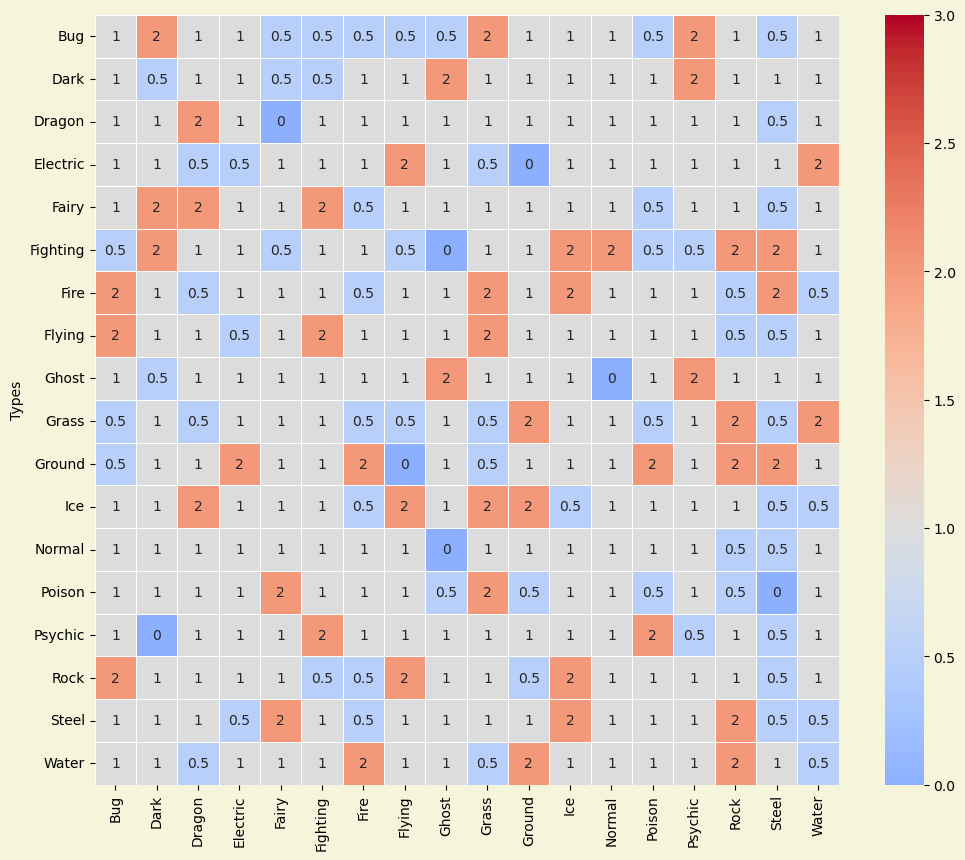

In [92]:
#colors = ['plum','lightblue','khaki', 'lightgreen']
colors = sns.color_palette("coolwarm", as_cmap=True)

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(TypingChart ,annot= True, cmap=colors ,linewidths=.5,center=1,vmax=3)
fig.patch.set_facecolor('beige')

## 4. Korelacja typów i statystyk

### Korelacja wszystkich pokemonów i ich statystyk

In [93]:
PokemonDB_stats = PokemonDB[['type1','attack','sp_attack','defense','sp_defense','hp','speed']]
PokemonDB_stats = PokemonDB_stats.groupby('type1').mean()
PokemonDB_stats.to_csv('PokemonDB_stats.csv')
PokemonDB_stats

,attack,sp_attack,defense,sp_defense,hp,speed
type1,,,,,,
Bug,70.125000,56.652778,70.847222,62.513889,56.722222,63.569444
Dark,87.793103,74.517241,70.517241,69.068966,72.551724,75.310345
Dragon,106.407407,89.592593,86.259259,84.555556,79.851852,76.111111
Electric,70.820513,87.538462,61.820513,70.051282,60.512821,85.410256
Fairy,62.111111,81.500000,68.166667,87.777778,73.944444,53.666667
Fighting,99.178571,50.107143,66.392857,63.428571,71.428571,64.285714
Fire,81.500000,87.730769,67.788462,71.538462,68.730769,73.346154
Flying,66.666667,84.000000,65.000000,70.000000,68.000000,99.666667
Ghost,72.740741,82.444444,79.518519,78.296296,63.370370,58.333333


,attack,sp_attack,defense,sp_defense,hp,speed
attack,1.000000,-0.303047,0.534808,-0.085486,0.367014,-0.140044
sp_attack,-0.303047,1.000000,-0.066165,0.726097,0.092477,0.437959
defense,0.534808,-0.066165,1.000000,0.360700,-0.027722,-0.429708
sp_defense,-0.085486,0.726097,0.360700,1.000000,0.306097,-0.103986
hp,0.367014,0.092477,-0.027722,0.306097,1.000000,0.041754
speed,-0.140044,0.437959,-0.429708,-0.103986,0.041754,1.000000


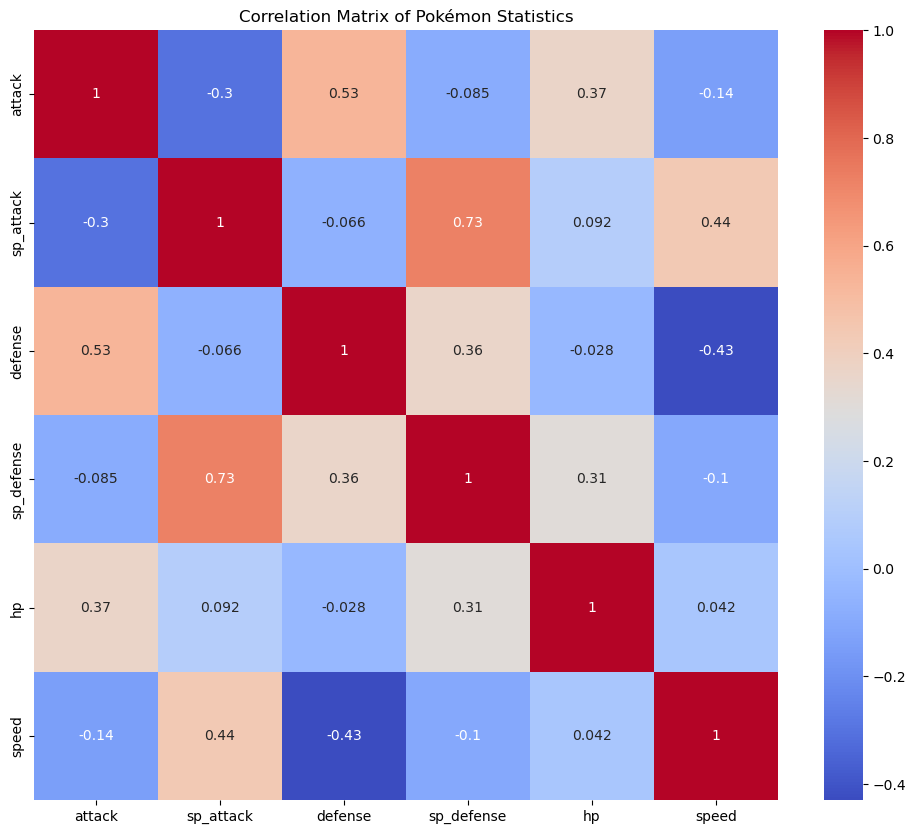

In [94]:
correlation_matrix_PokemonDB_stats = PokemonDB_stats.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_PokemonDB_stats, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Statistics')
correlation_matrix_PokemonDB_stats

### Przygotowanie danych do wykresu korelacji. Tworzymy bazę danych gdzie indexem będzie type1, kolumnami konretne statystyki a wartości to uśrednione wartości.

In [95]:
one_type_stats = one_typedb[['type1','attack','sp_attack','defense','sp_defense','hp','speed']]
one_type_stats = one_type_stats.groupby('type1').mean()
one_type_stats.to_csv('one_type_stats.csv')
one_type_stats

,attack,sp_attack,defense,sp_defense,hp,speed
type1,,,,,,
Bug,52.666667,40.722222,58.166667,45.944444,52.722222,48.944444
Dark,84.222222,82.000000,61.333333,61.888889,60.000000,83.555556
Dragon,89.083333,58.583333,66.916667,69.416667,60.416667,59.500000
Electric,69.730769,82.230769,56.500000,67.038462,60.500000,82.692308
Fairy,64.250000,79.187500,65.437500,85.000000,74.437500,52.875000
Fighting,97.454545,42.636364,63.681818,62.045455,71.363636,59.500000
Fire,77.370370,76.851852,57.592593,63.000000,61.111111,71.407407
Flying,100.000000,110.000000,80.000000,90.000000,79.000000,121.000000
Ghost,72.222222,72.333333,90.555556,92.333333,47.666667,51.666667


### Usunięcie flying spowodu zawyżenia stastystyk (tytlko 2 pokemony w bazie mają Flying jako jedyny typ i są to pokemony Legendarne z wysokimi statystykami)

In [96]:
type_stats_NO_Flying = one_type_stats.drop('Flying')

### Heatmapa korelacji statystyk pokemonów z tylko "type1"

,attack,sp_attack,defense,sp_defense,hp,speed
attack,1.000000,-0.421250,0.387854,-0.189046,0.284870,-0.230461
sp_attack,-0.421250,1.000000,-0.187078,0.539939,-0.014844,0.628770
defense,0.387854,-0.187078,1.000000,0.458287,-0.054516,-0.620117
sp_defense,-0.189046,0.539939,0.458287,1.000000,-0.017507,0.008946
hp,0.284870,-0.014844,-0.054516,-0.017507,1.000000,-0.024483
speed,-0.230461,0.628770,-0.620117,0.008946,-0.024483,1.000000


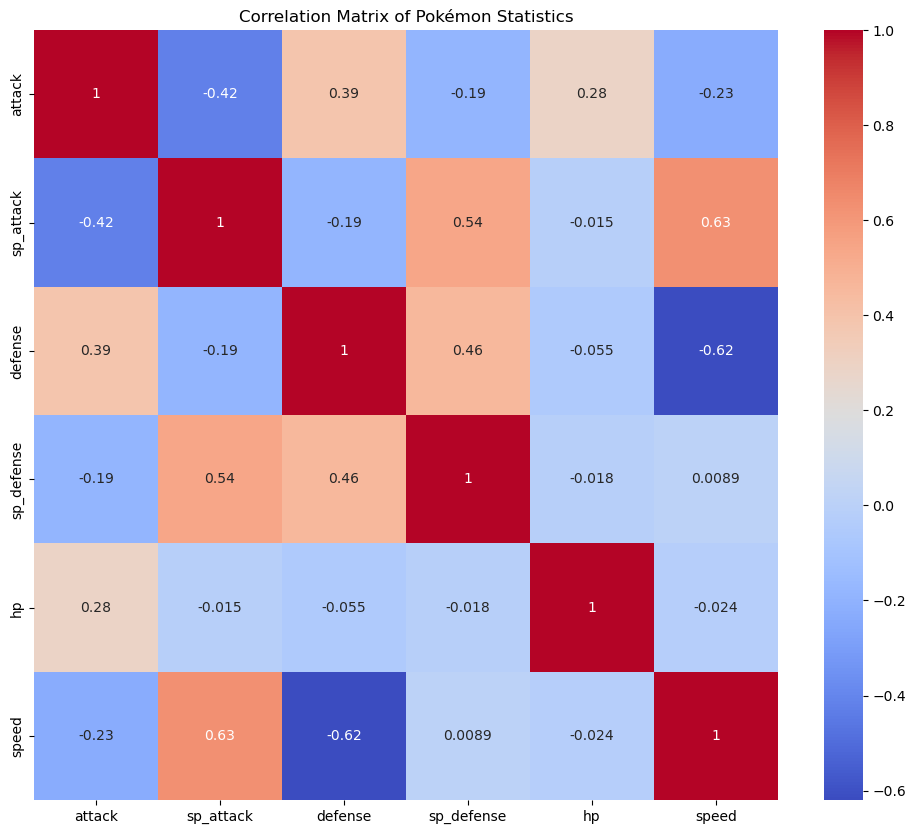

In [97]:
correlation_matrix_only_one_type_stats = type_stats_NO_Flying.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_only_one_type_stats, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Statistics')
correlation_matrix_only_one_type_stats

In [98]:
#PokemonDB = pd.read_csv(r'PokemonDB_updated.csv')
#PokemonDB = PokemonDB.fillna('')
#PokemonDB['CombinedTypes'] = PokemonDB['type1']+PokemonDB['type2']
#CombinedTypes = PokemonDB
#CombinedTypes = CombinedTypes[['CombinedTypes','attack','sp_attack','defense','sp_defense','hp','speed']]
#CombinedTypes = CombinedTypes.groupby('CombinedTypes').mean()
#CombinedTypes

In [99]:
#correlation_matrix_CombinedTypes = CombinedTypes.corr()
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix_CombinedTypes, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix of Pokémon Statistics')
#correlation_matrix_CombinedTypes

### Przygotowanie danych do wykresu korelacji gdzie pokemony mają 'type1' i 'type2'

In [100]:
type1_and_type2_stats = type1_and_type2[['type1','attack','sp_attack','defense','sp_defense','hp','speed']]
type1_and_type2_stats = type1_and_type2_stats.groupby('type1').mean()
type1_and_type2_stats

,attack,sp_attack,defense,sp_defense,hp,speed
type1,,,,,,
Bug,75.944444,61.962963,75.074074,68.037037,58.055556,68.444444
Dark,89.400000,71.150000,74.650000,72.300000,78.200000,71.600000
Dragon,120.266667,114.400000,101.733333,96.666667,95.400000,89.400000
Electric,73.000000,98.153846,72.461538,76.076923,60.538462,90.846154
Fairy,45.000000,100.000000,90.000000,110.000000,70.000000,60.000000
Fighting,105.500000,77.500000,76.333333,68.500000,71.666667,81.833333
Fire,85.960000,99.480000,78.800000,80.760000,76.960000,75.440000
Flying,50.000000,71.000000,57.500000,60.000000,62.500000,89.000000
Ghost,73.000000,87.500000,74.000000,71.277778,71.222222,61.666667


### Heatmapa korelacji statystyk pokemonów tylko z 'type1' i 'type2'

,attack,sp_attack,defense,sp_defense,hp,speed
attack,1.000000,0.123083,0.504186,0.046684,0.560375,0.175185
sp_attack,0.123083,1.000000,0.280346,0.778729,0.475615,0.393703
defense,0.504186,0.280346,1.000000,0.555820,0.259379,-0.298582
sp_defense,0.046684,0.778729,0.555820,1.000000,0.409858,-0.013462
hp,0.560375,0.475615,0.259379,0.409858,1.000000,0.153519
speed,0.175185,0.393703,-0.298582,-0.013462,0.153519,1.000000


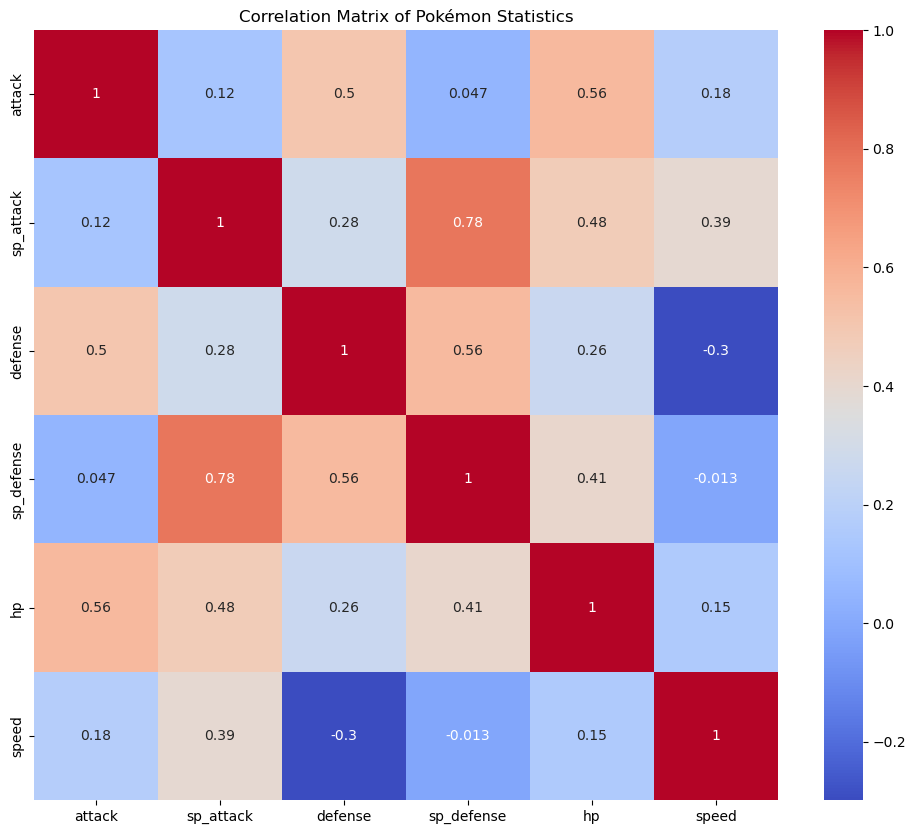

In [101]:
correlation_matrix_type1_and_type2_stats = type1_and_type2_stats.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_type1_and_type2_stats, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Statistics')
correlation_matrix_type1_and_type2_stats

### Pokazanie różnicy obu wyników

In [102]:
correlation_matri_differance = correlation_matrix_type1_and_type2_stats- correlation_matrix_only_one_type_stats 
correlation_matri_differance

,attack,sp_attack,defense,sp_defense,hp,speed
attack,0.000000,0.544332,0.116332,0.235730,0.275504,0.405646
sp_attack,0.544332,0.000000,0.467424,0.238791,0.490459,-0.235067
defense,0.116332,0.467424,0.000000,0.097533,0.313895,0.321535
sp_defense,0.235730,0.238791,0.097533,0.000000,0.427365,-0.022409
hp,0.275504,0.490459,0.313895,0.427365,0.000000,0.178003
speed,0.405646,-0.235067,0.321535,-0.022409,0.178003,0.000000


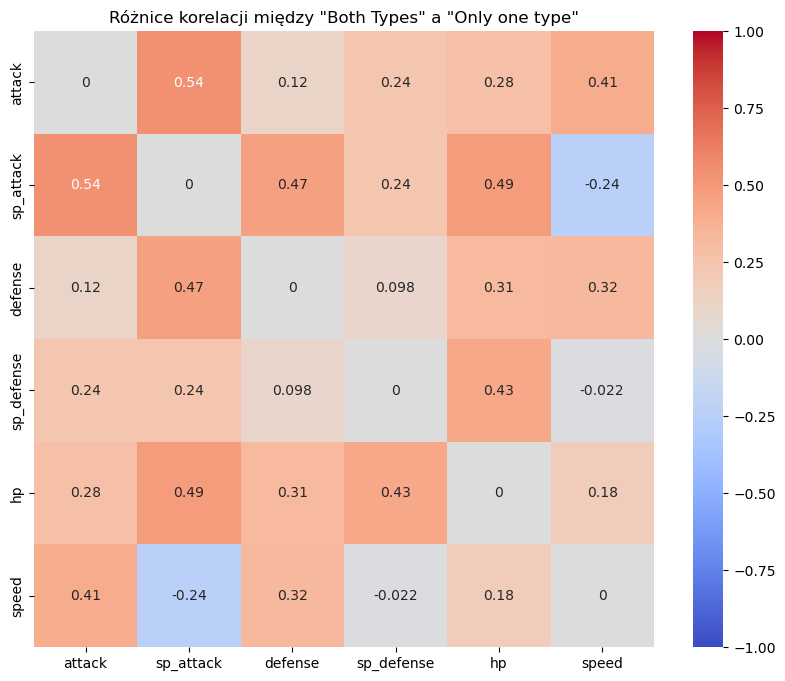

In [103]:
# Wizualizacja różnicy na heatmapie
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matri_differance, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Różnice korelacji między "Both Types" a "Only one type"')
plt.show()

### Jak można zaobserwować jest znaczna różnica statystyk. Taka różnica może być spowodowana ewolucją  do drugiej bądź trzeciej formy co równierz znacząco zwiększa statystyki. Nastepne analizy na pewno będą na to zwracac uwagę.

In [104]:
#correlation_matri_differance = correlation_matrix_CombinedTypes- correlation_matrix_only_one_type_stats 
#correlation_matri_differance

In [105]:
## Wizualizacja różnicy na heatmapie
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matri_differance, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
#plt.title('Różnice korelacji między "Only one type" a "Both Types"')
#plt.show()

## 5. Pokazanie róznicy w statystykach pokemonów po typach głównych

### Wizualne zobrazowanie statystyk pokemonów na siatce z wykresami słupkowymi

In [106]:
PokemonDB_stats.reset_index(inplace=True)

,type1,attack,sp_attack,defense,sp_defense,hp,speed
0,Bug,70.125000,56.652778,70.847222,62.513889,56.722222,63.569444
1,Dark,87.793103,74.517241,70.517241,69.068966,72.551724,75.310345
2,Dragon,106.407407,89.592593,86.259259,84.555556,79.851852,76.111111
3,Electric,70.820513,87.538462,61.820513,70.051282,60.512821,85.410256
4,Fairy,62.111111,81.500000,68.166667,87.777778,73.944444,53.666667
5,Fighting,99.178571,50.107143,66.392857,63.428571,71.428571,64.285714
6,Fire,81.500000,87.730769,67.788462,71.538462,68.730769,73.346154
7,Flying,66.666667,84.000000,65.000000,70.000000,68.000000,99.666667
8,Ghost,72.740741,82.444444,79.518519,78.296296,63.370370,58.333333
9,Grass,73.769231,74.320513,70.871795,69.230769,65.358974,59.025641


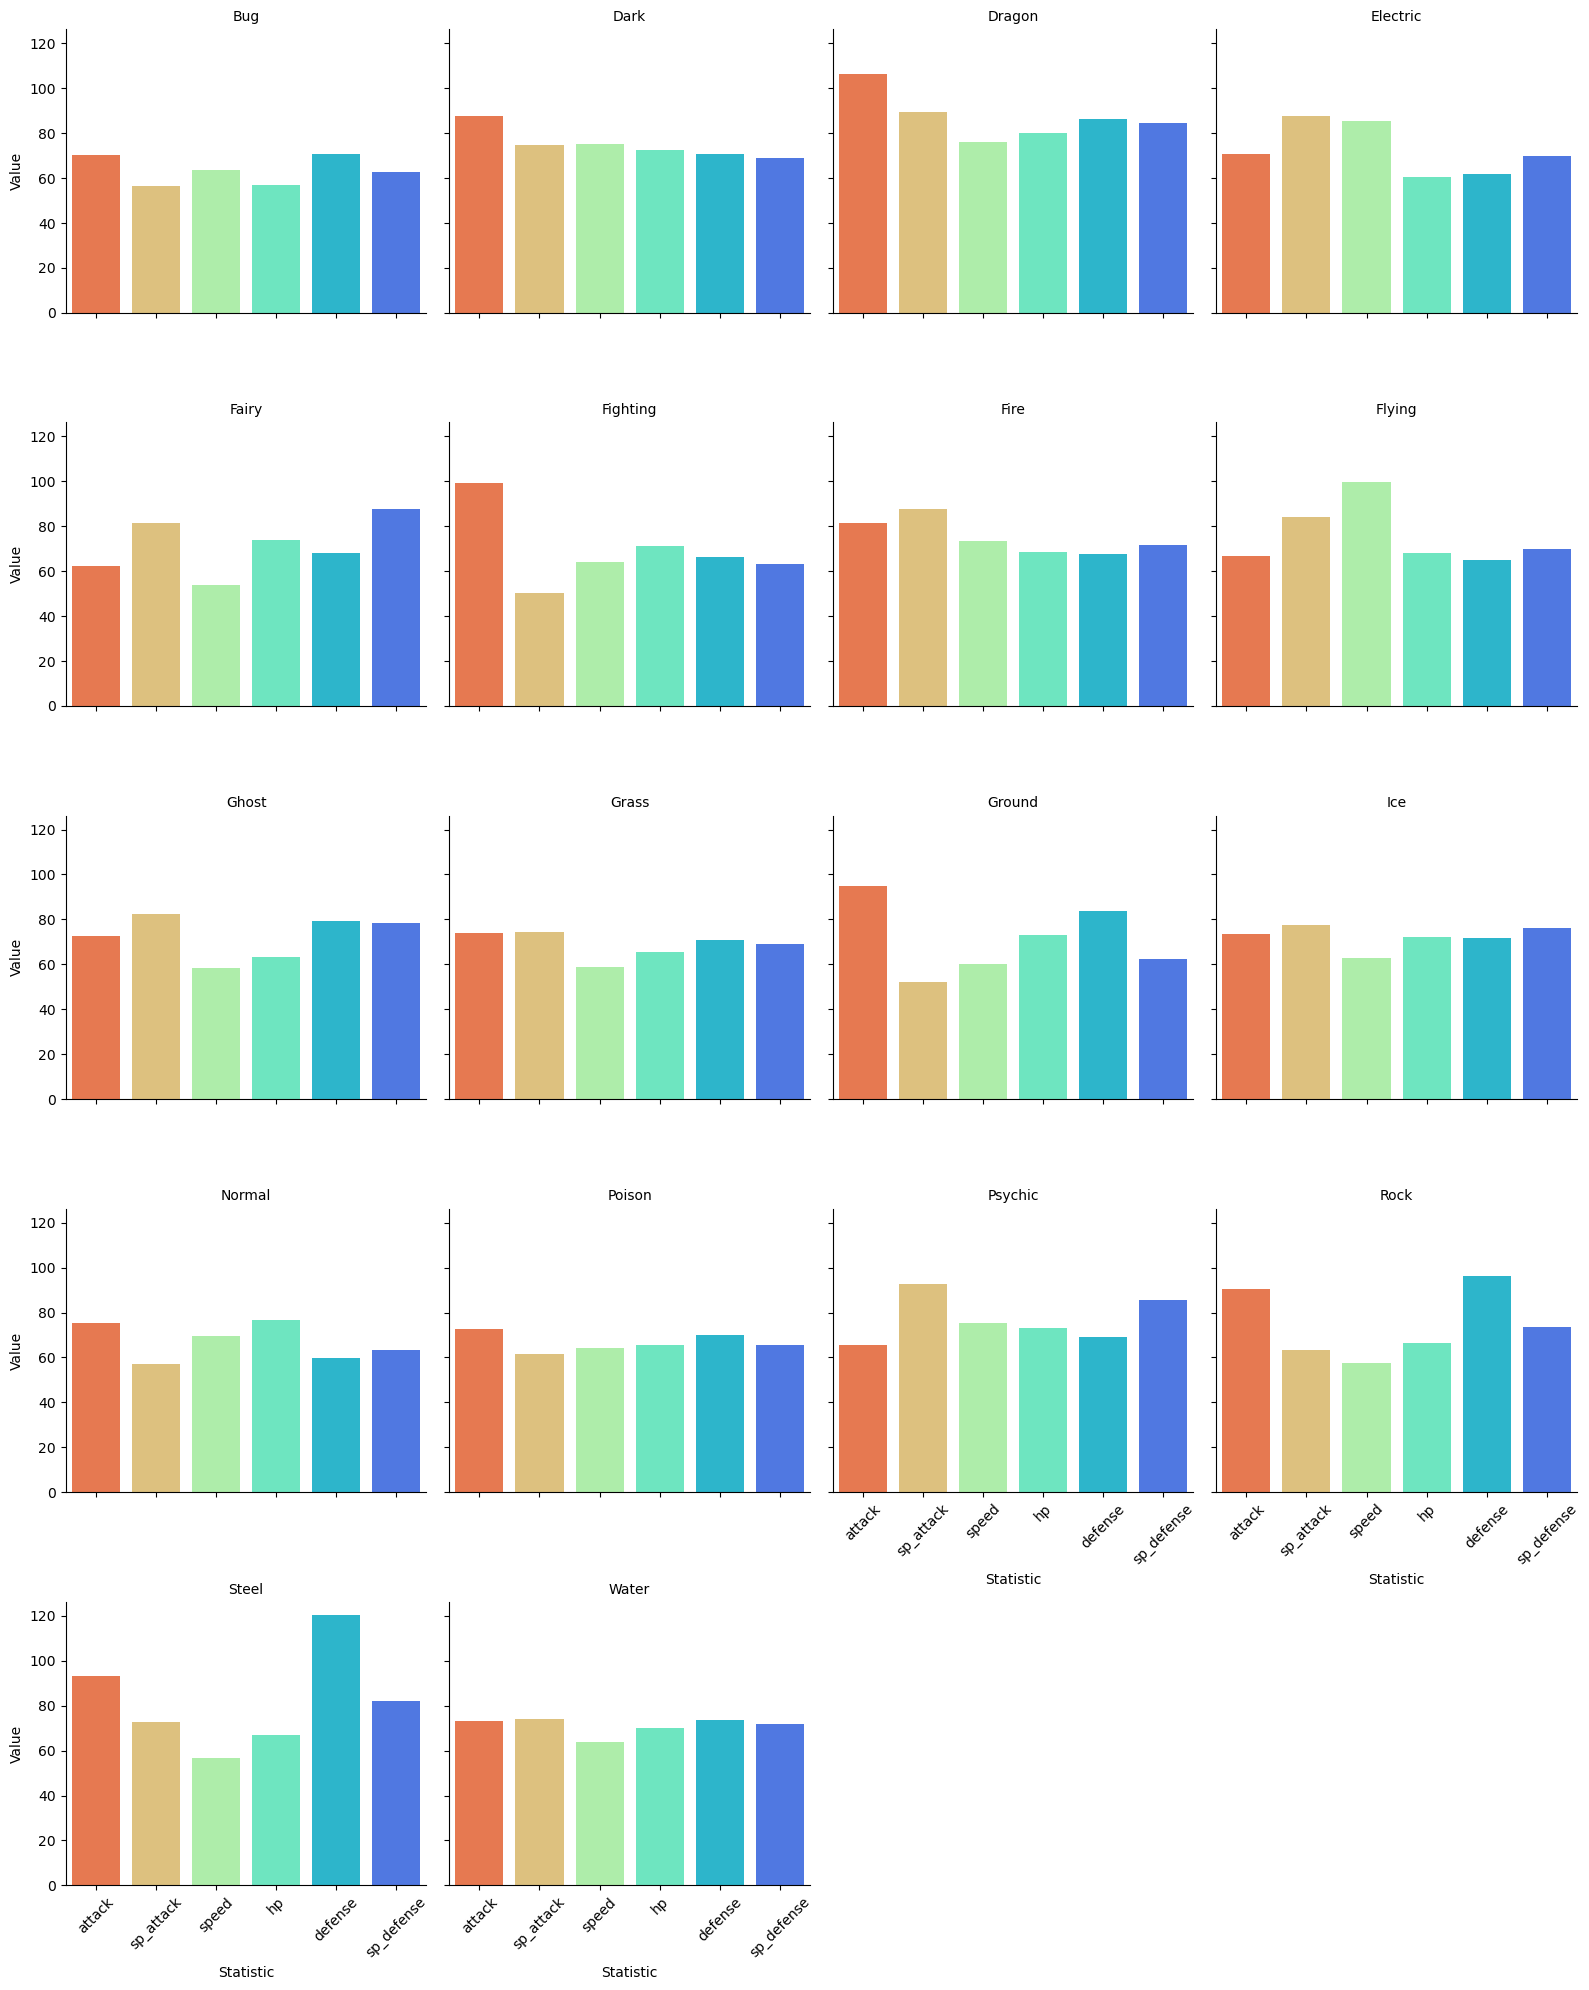

In [107]:
# Melt the DataFrame to long format
melted_data = pd.melt(PokemonDB_stats, id_vars=['type1'], 
                      value_vars=['attack',  'sp_attack','speed','hp', 'defense','sp_defense'],
                      var_name='Statistic', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(melted_data, col="type1", col_wrap=4, sharey=True, height=4)
g.map_dataframe(sns.barplot, x='Statistic', y='Value', palette='rainbow_r',hue='Statistic',legend=False)

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust the layout
g.set_axis_labels("Statistic", "Value")
g.set_titles(col_template="{col_name}")
g.fig.tight_layout()
PokemonDB_stats

In [108]:
#correlation_matrix_CombinedTypes = CombinedTypes.corr()
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix_CombinedTypes, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix of Pokémon Statistics')
#correlation_matrix_CombinedTypes

In [109]:
#import plotly.express as px
#for i in range(len(type_stats.index)):
#    df = pd.DataFrame(dict(
#        value = type_stats.iloc[i].tolist(),
#        stat=['attack','defens','sp_attack', 'sp_defense','hp','speed']))
#    
#    fig = px.line_polar(df, r='value', theta='stat', line_close=True)
#    fig.update_traces(fill='toself')
#    fig.show()

### Wizualne zobrazowanie statystyk pokemonów na siatce wykresów polarnych przy pomocy biblioteki 'plotly'

In [110]:
PokemonDB_stats = PokemonDB_stats.set_index("type1")

In [111]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
num_rows = 6
num_cols = 3

# Create a subplot grid
fig = make_subplots(rows=num_rows, cols=num_cols, specs=[[{'type': 'polar'}] * num_cols] * num_rows)

# Add polar plots to the grid
for i in range(len(PokemonDB_stats.index)):
    row = i // num_cols + 1
    col = i % num_cols + 1

    df = pd.DataFrame(dict(
        value=PokemonDB_stats.iloc[i].tolist(),
        stat=['att.', 'def.', 'sp_a.', 'sp_d.', 'hp.', 'spd.']
    ))
    
    hover_text = [f"{stat}: {value:.1f}" for stat, value in zip(df['stat'], df['value'])]
    labels = [f"{stat}: {value:.1f}" for stat, value in zip(df['stat'], df['value'])]

    polar_plot = go.Scatterpolar(
        r=df['value'],
        theta=df['stat'],
        fill='toself',
        name=PokemonDB_stats.index[i],
        line=dict(color=pokemon_colors.get(PokemonDB_stats.index[i], 'black')),
        hoverinfo='text+name',  # Include text and name
        text=labels,
        textposition='top left'# Detailed hover text
    )

    fig.add_trace(polar_plot, row=row, col=col)
    
    # Update layout for polar plots in grid
for row in range(1, num_rows + 1):
    for col in range(1, num_cols + 1):
        fig.update_polars(
            row=row, col=col,
            radialaxis=dict(
                tickfont=dict(size=10),
                range=[0, 130]
            ),
            angularaxis=dict(
                tickfont=dict(size=10)
            )
        )

# Update layout
fig.update_layout(
    title_text="Polar Plots in Grid Layout",
    showlegend = False,
    height=400 * num_rows,  # Adjust height based on number of rows
    width=1200,  # Adjust width as needed
    title_font_size=20,
    
    margin=dict(t=100, b=50, l=100, r=100)  # Adjust margins as needed
)

### Na obu siatkach wykresów zostały zobarazowane statysyki pokemonów które można z łatwościa porównac.

### pokazać czy typ pokemona ma znaczenie na % danej płci, i ogólnikowe wystepowanie danej płci wszsytkich pokemonów ile pokemonów nie ma płci

### pokazać co ma znaczenie przy zdobywaniu doświadzczenia

### czy typ pokemona ma znaczenia na jego wzrost i wagę

### pokazać co ma znaczenie przy łapaniu pokemona

### na podstawie wagi, wzrostu i typu sprawdzić korelacje miedzy danymi 

In [115]:
PokemonDBShort = PokemonDB.loc[:,['type1','is_legendary','attack','sp_attack','defense','sp_defense','hp','speed','base_total','height_m','weight_kg','percentage_male','capture_rate','experience_growth']]
PokemonDBShort = PokemonDBShort.groupby(['type1']).mean().reset_index()
PokemonDBShort.head()



,type1,is_legendary,attack,sp_attack,defense,sp_defense,hp,speed,base_total,height_m,weight_kg,percentage_male,capture_rate,experience_growth
0,Bug,0.041667,70.125000,56.652778,70.847222,62.513889,56.722222,63.569444,380.430556,0.883333,33.083333,49.825000,119.833333,1.009006e+06
1,Dark,0.103448,87.793103,74.517241,70.517241,69.068966,72.551724,75.310345,449.758621,1.296552,69.096552,50.550000,84.482759,1.102720e+06
2,Dragon,0.259259,106.407407,89.592593,86.259259,84.555556,79.851852,76.111111,522.777778,1.937037,107.125926,50.000000,37.333333,1.216667e+06
3,Electric,0.128205,70.820513,87.538462,61.820513,70.051282,60.512821,85.410256,436.153846,0.981579,37.944737,55.665517,106.974359,1.073312e+06
4,Fairy,0.055556,62.111111,81.500000,68.166667,87.777778,73.944444,53.666667,427.166667,0.794444,23.555556,41.176471,116.944444,9.138889e+05


In [117]:
PokemonDBShort.set_index('type1')

,is_legendary,attack,sp_attack,defense,sp_defense,hp,speed,base_total,height_m,weight_kg,percentage_male,capture_rate,experience_growth
type1,,,,,,,,,,,,,
Bug,0.041667,70.125000,56.652778,70.847222,62.513889,56.722222,63.569444,380.430556,0.883333,33.083333,49.825000,119.833333,1.009006e+06
Dark,0.103448,87.793103,74.517241,70.517241,69.068966,72.551724,75.310345,449.758621,1.296552,69.096552,50.550000,84.482759,1.102720e+06
Dragon,0.259259,106.407407,89.592593,86.259259,84.555556,79.851852,76.111111,522.777778,1.937037,107.125926,50.000000,37.333333,1.216667e+06
Electric,0.128205,70.820513,87.538462,61.820513,70.051282,60.512821,85.410256,436.153846,0.981579,37.944737,55.665517,106.974359,1.073312e+06
Fairy,0.055556,62.111111,81.500000,68.166667,87.777778,73.944444,53.666667,427.166667,0.794444,23.555556,41.176471,116.944444,9.138889e+05
Fighting,0.000000,99.178571,50.107143,66.392857,63.428571,71.428571,64.285714,414.821429,1.196429,58.675000,70.692857,103.750000,1.076021e+06
Fire,0.096154,81.500000,87.730769,67.788462,71.538462,68.730769,73.346154,450.634615,1.168000,66.096000,68.491667,72.403846,1.064735e+06
Flying,0.333333,66.666667,84.000000,65.000000,70.000000,68.000000,99.666667,453.333333,1.166667,52.000000,66.666667,79.333333,1.083333e+06
Ghost,0.037037,72.740741,82.444444,79.518519,78.296296,63.370370,58.333333,434.703704,1.251852,69.570370,50.000000,93.814815,1.018117e+06


In [118]:
correlation_matrix = PokemonDBShort.corr()

ValueError: could not convert string to float: 'Bug'

### konwersja statystyk do Pokemon Go

### pokazać różnicę w statystykach gier pokemon z pokemon go